In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
def generate_3d_data(means, std_devs, num_points):
    """Generates 3D data with a specified mean and standard deviation.
    """
    x_data = np.random.normal(means[0], std_devs[0], num_points)
    y_data = np.random.normal(means[1], std_devs[1], num_points)
    z_data = np.random.normal(means[2], std_devs[2], num_points)
    data = np.vstack((x_data, y_data, z_data)).T
    return data

In [26]:
data_c1 = generate_3d_data([0, 0, 0], [0.5, 0.5, 1], 100)
data_c2 = generate_3d_data([1, 1, 1], [0.5, 0.5, 0.5], 100)

Text(0.5, 0, 'Z Label')

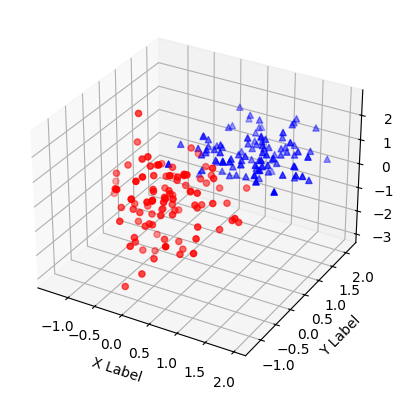

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data_c1[:,0], data_c1[:,1], data_c1[:,2], marker='o', c='r')
ax.scatter(data_c2[:,0], data_c2[:,1], data_c2[:,2], marker='^', c='b')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [32]:
X_new = np.vstack((data_c1, data_c2))
y_new = np.hstack( ( np.zeros(100), np.ones(100) ) )
X_new.shape

(200, 3)

In [39]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_new, y_new)

# Datos transformados por LDA
X_lda = lda.transform(X_new)
print("Dimensión de los datos transformados por LDA:", X_lda.shape)

W = lda.coef_[0]
print("Dirección del LDA:", W)

Dimensión de los datos transformados por LDA: (200, 1)
Dirección del LDA: [3.55059512 4.56199545 1.88264987]


In [41]:
n2 = np.linalg.norm(W)**2
# Datos en la dimensión original proyectados sobre la dirección del LDA
X_t = X_lda.dot(W.reshape(1, -1)) / n2
print("Dimensión de los datos proyectados sobre la dirección del LDA en la dimensión original:", X_t.shape)

Dimensión de los datos proyectados sobre la dirección del LDA en la dimensión original: (200, 3)


In [42]:
X_new[:5]

array([[ 0.14822318, -0.21579488,  0.26321567],
       [-0.40270006, -0.43182501, -0.49899196],
       [-0.08178867, -0.38377519, -0.98470321],
       [ 0.83717191,  0.15530827, -1.17432077],
       [ 0.35649181, -0.13353087,  1.04661512]])

In [43]:
X_t[:5]

array([[-0.13657016, -0.17547268, -0.07241428],
       [-0.26310304, -0.33804892, -0.13950644],
       [-0.25026053, -0.32154818, -0.1326969 ],
       [-0.09514702, -0.12225001, -0.05045028],
       [-0.06170077, -0.07927646, -0.03271591]])